In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import librosa
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tarfile
import requests
import math
import os
from tqdm import tqdm
from keras.models import Sequential
from kapre.time_frequency import Melspectrogram, Spectrogram
from kapre.utils import Normalization2D
from tensorflow.keras.models import Model, load_model
import zipfile
from keras.utils import to_categorical

Using TensorFlow backend.


In [ ]:
with zipfile.ZipFile('/content/gdrive/My Drive/trainData.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
with zipfile.ZipFile('/content/gdrive/My Drive/testData.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
# 10 categories
categories = {
  'down': 0,
  'go': 1,
  'left': 2,
  'no': 3,
  'off': 4,
  'on': 5,
  'right': 6,
  'stop': 7,
  'up': 8,
  'yes': 9
}


downWavs = []
for root, dirs, files in os.walk('dataset/train/down/'):
  downWavs += [ root + '/' + fille for fille in files if fille.endswith('.wav.npy')]
goWavs = []
for root, dirs, files in os.walk('dataset/train/go/'):
  goWavs += [ root + '/' + fille for fille in files if fille.endswith('.wav.npy')]
leftWavs = []
for root, dirs, files in os.walk('dataset/train/left/'):
  leftWavs += [ root + '/' + fille for fille in files if fille.endswith('.wav.npy')]
noWavs = []
for root, dirs, files in os.walk('dataset/train/no/'):
  noWavs += [ root + '/' + fille for fille in files if fille.endswith('.wav.npy')]
offWavs = []
for root, dirs, files in os.walk('dataset/train/off/'):
  offWavs += [ root + '/' + fille for fille in files if fille.endswith('.wav.npy')]
onWavs = []
for root, dirs, files in os.walk('dataset/train/on/'):
  onWavs += [ root + '/' + fille for fille in files if fille.endswith('.wav.npy')]
rightWavs = []
for root, dirs, files in os.walk('dataset/train/right/'):
  rightWavs += [ root + '/' + fille for fille in files if fille.endswith('.wav.npy')]
stopWavs = []
for root, dirs, files in os.walk('dataset/train/stop/'):
  stopWavs += [ root + '/' + fille for fille in files if fille.endswith('.wav.npy')]
upWavs = []
for root, dirs, files in os.walk('dataset/train/up/'):
  upWavs += [ root + '/' + fille for fille in files if fille.endswith('.wav.npy')]
yesWavs = []
for root, dirs, files in os.walk('dataset/train/yes/'):
  yesWavs += [ root + '/' + fille for fille in files if fille.endswith('.wav.npy')]

trainWavs = downWavs + goWavs + leftWavs + noWavs + offWavs + onWavs + rightWavs + stopWavs + upWavs + yesWavs

trainWavsClasse = [categories.get(os.path.basename(os.path.dirname(wav))) for wav in trainWavs]

downWavs = []
for root, dirs, files in os.walk('dataset/test/down/'):
  downWavs += [ root + '/' + fille for fille in files if fille.endswith('.wav.npy')]
goWavs = []
for root, dirs, files in os.walk('dataset/test/go/'):
  goWavs += [ root + '/' + fille for fille in files if fille.endswith('.wav.npy')]
leftWavs = []
for root, dirs, files in os.walk('dataset/test/left/'):
  leftWavs += [ root + '/' + fille for fille in files if fille.endswith('.wav.npy')]
noWavs = []
for root, dirs, files in os.walk('dataset/test/no/'):
  noWavs += [ root + '/' + fille for fille in files if fille.endswith('.wav.npy')]
offWavs = []
for root, dirs, files in os.walk('dataset/test/off/'):
  offWavs += [ root + '/' + fille for fille in files if fille.endswith('.wav.npy')]
onWavs = []
for root, dirs, files in os.walk('dataset/test/on/'):
  onWavs += [ root + '/' + fille for fille in files if fille.endswith('.wav.npy')]
rightWavs = []
for root, dirs, files in os.walk('dataset/test/right/'):
  rightWavs += [ root + '/' + fille for fille in files if fille.endswith('.wav.npy')]
stopWavs = []
for root, dirs, files in os.walk('dataset/test/stop/'):
  stopWavs += [ root + '/' + fille for fille in files if fille.endswith('.wav.npy')]
upWavs = []
for root, dirs, files in os.walk('dataset/test/up/'):
  upWavs += [ root + '/' + fille for fille in files if fille.endswith('.wav.npy')]
yesWavs = []
for root, dirs, files in os.walk('dataset/test/yes/'):
  yesWavs += [ root + '/' + fille for fille in files if fille.endswith('.wav.npy')]

testWavs = downWavs + goWavs + leftWavs + noWavs + offWavs + onWavs + rightWavs + stopWavs + upWavs + yesWavs

testWavsClasse = [categories.get(os.path.basename(os.path.dirname(wav))) for wav in testWavs]

In [ ]:
def convertWavs(IDs_list, nWavs, fs, cate):
        x = np.empty((nWavs, fs))
        y = np.empty((nWavs), dtype=int)

        # Generate data
        for i, ID in enumerate(IDs_list):

            signal = np.load(ID)

            if signal.shape[0] == fs:
                x[i] = signal
            elif signal.shape[0] > fs:
                randPos = np.random.randint(signal.shape[0]-fs)
                x[i] = signal[randPos:randPos+fs]
            else:  # smaller
                randPos = np.random.randint(fs-signal.shape[0])
                x[i, randPos:randPos + signal.shape[0]] = signal

            y[i] = cate.get(os.path.basename(os.path.dirname(ID)))

        return x, y

fs = 16000
signalLen = 16000
xtrain, ytrain = convertWavs(trainWavs, len(trainWavs), fs, categories)
xtest, ytest = convertWavs(testWavs, len(testWavs), fs, categories)

#ytrain = to_categorical(ytrain)
#ytest = to_categorical(ytest)

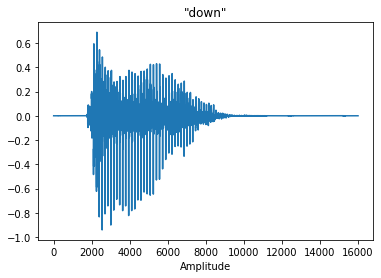

In [ ]:
plt.plot(xtrain[0])
plt.xlabel('Amostras')
plt.xlabel('Amplitude')
plt.title('"down"')
plt.show()

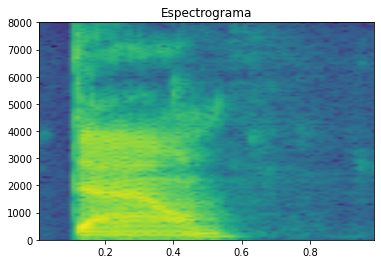

In [ ]:
import scipy
sig = xtrain[0]

f, t, Sxx = scipy.signal.spectrogram(sig, 16000)
plt.pcolormesh(t, f, 10*np.log10(Sxx), shading='gouraud')
plt.title('Espectrograma')


In [ ]:
melspecModel = Sequential()
melspecModel.add(Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, signalLen),
                         padding='same', sr=fs, n_mels=80,
                         fmin=40.0, fmax=fs/2, power_melgram=1.0,
                         return_decibel_melgram=True, trainable_fb=False,
                         trainable_kernel=False,
                         name='mel_stft') )

melspecModel.add(Normalization2D(int_axis=0))
melspecModel.summary()

tracking <tf.Variable 'mel_stft/real_kernels:0' shape=(1024, 1, 1, 513) dtype=float32> dft_real_kernels
tracking <tf.Variable 'mel_stft/imag_kernels:0' shape=(1024, 1, 1, 513) dtype=float32> dft_imag_kernels
tracking <tf.Variable 'mel_stft/Variable:0' shape=(513, 80) dtype=float32> freq2mel
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mel_stft (Melspectrogram)    (None, 80, 125, 1)        1091664   
_________________________________________________________________
normalization2d_1 (Normaliza (None, 80, 125, 1)        0         
Total params: 1,091,664
Trainable params: 1,091,664
Non-trainable params: 0
_________________________________________________________________


In [ ]:
melspec = melspecModel.predict( xtrain[0].reshape((-1,1,signalLen)) )
melspec.shape

(1, 80, 125, 1)

In [ ]:
from keras import layers as Layer
from keras.models import Model
from keras.callbacks import ModelCheckpoint

modelPath = '/content/gdrive/My Drive/model.h5'
model = Sequential()
model.add(Layer.Reshape((1,-1), input_shape=(signalLen,)))
model.add(
    Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, signalLen),
                         padding='same', sr=fs, n_mels=80,
                         fmin=40.0, fmax=fs/2, power_melgram=1.0,
                         return_decibel_melgram=True, trainable_fb=False,
                         trainable_kernel=False,
                         name='mel_stft')
)
model.add(Normalization2D(int_axis=0))

model.add(Layer.Conv2D(32, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(Layer.Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(Layer.MaxPooling2D(pool_size=(2, 2)))
model.add(Layer.Dropout(0.25))

model.add(Layer.Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(Layer.MaxPooling2D(pool_size=(2, 2)))
model.add(Layer.Dropout(0.25))

model.add(Layer.Conv2D(128, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(Layer.MaxPooling2D(pool_size=(2, 2)))
model.add(Layer.Dropout(0.25))

model.add(Layer.Flatten())
model.add(Layer.Dense(128, activation='relu'))
model.add(Layer.Dropout(0.4))
model.add(Layer.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])

checkpointer = ModelCheckpoint(modelPath, monitor='val_sparse_categorical_accuracy', verbose=1, save_best_only=True)
#model.summary()

results = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), batch_size=100, epochs=50, verbose=1, callbacks=[checkpointer])

pd.DataFrame.from_dict(results.history).to_csv('/content/gdrive/My Drive/history.csv',index=False)

tracking <tf.Variable 'mel_stft_2/real_kernels:0' shape=(1024, 1, 1, 513) dtype=float32> dft_real_kernels
tracking <tf.Variable 'mel_stft_2/imag_kernels:0' shape=(1024, 1, 1, 513) dtype=float32> dft_imag_kernels
tracking <tf.Variable 'mel_stft_2/Variable:0' shape=(513, 80) dtype=float32> freq2mel
Train on 23682 samples, validate on 2567 samples
Epoch 1/50
23682/23682 [==============================] - 1821s 77ms/step - loss: 2.2473 - sparse_categorical_accuracy: 0.1435 - val_loss: 1.8498 - val_sparse_categorical_accuracy: 0.3335

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.33346, saving model to /content/gdrive/My Drive/model.h5
Epoch 2/50
23682/23682 [==============================] - 1792s 76ms/step - loss: 1.5869 - sparse_categorical_accuracy: 0.4335 - val_loss: 1.2353 - val_sparse_categorical_accuracy: 0.5882

Epoch 00002: val_sparse_categorical_accuracy improved from 0.33346 to 0.58824, saving model to /content/gdrive/My Drive/model.h5
Epoch 3/50
23682/236

In [ ]:
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

modelPath = '/content/gdrive/My Drive/model.h5'

model2 = load_model(modelPath, custom_objects={'Melspectrogram': Melspectrogram, 'Normalization2D': Normalization2D})
checkpointer = ModelCheckpoint(modelPath, monitor='val_sparse_categorical_accuracy', verbose=1, save_best_only=True)
results2 = model2.fit(xtrain, ytrain, validation_data=(xtest, ytest), batch_size=100, epochs=9, verbose=1, callbacks=[checkpointer])


tracking <tf.Variable 'mel_stft_2/real_kernels:0' shape=(1024, 1, 1, 513) dtype=float32> dft_real_kernels
tracking <tf.Variable 'mel_stft_2/imag_kernels:0' shape=(1024, 1, 1, 513) dtype=float32> dft_imag_kernels
tracking <tf.Variable 'mel_stft_2/Variable:0' shape=(513, 80) dtype=float32> freq2mel
Train on 23682 samples, validate on 2567 samples
Epoch 1/9
23682/23682 [==============================] - 1723s 73ms/step - loss: 0.5953 - sparse_categorical_accuracy: 0.7972 - val_loss: 0.3526 - val_sparse_categorical_accuracy: 0.8788

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.87885, saving model to /content/gdrive/My Drive/model.h5
Epoch 2/9
23682/23682 [==============================] - 1716s 72ms/step - loss: 0.5732 - sparse_categorical_accuracy: 0.8001 - val_loss: 0.3422 - val_sparse_categorical_accuracy: 0.8843

Epoch 00002: val_sparse_categorical_accuracy improved from 0.87885 to 0.88430, saving model to /content/gdrive/My Drive/model.h5
Epoch 3/9
23682/23682 

In [ ]:
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

modelPath = '/content/gdrive/My Drive/model.h5'

model3 = load_model(modelPath, custom_objects={'Melspectrogram': Melspectrogram, 'Normalization2D': Normalization2D})



tracking <tf.Variable 'mel_stft/real_kernels:0' shape=(1024, 1, 1, 513) dtype=float32> dft_real_kernels
tracking <tf.Variable 'mel_stft/imag_kernels:0' shape=(1024, 1, 1, 513) dtype=float32> dft_imag_kernels
tracking <tf.Variable 'mel_stft/Variable:0' shape=(513, 80) dtype=float32> freq2mel


In [ ]:
model3.summary()

In [ ]:
import tensorflow as tf
import seaborn as sns

y_true = ytest

y_pred =  model3.predict_classes(xtest)


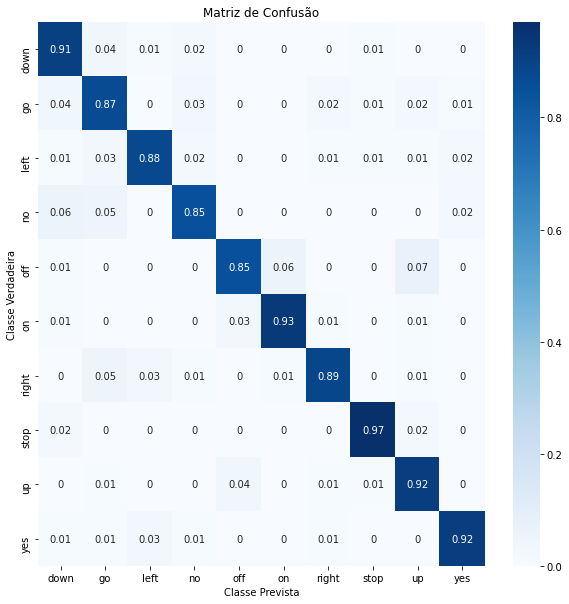

In [ ]:
classes = [
  'down',
  'go',
  'left',
  'no',
  'off',
  'on',
  'right',
  'stop',
  'up',
  'yes'
]
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                          index=classes,
                          columns=classes)

figure = plt.figure(figsize=(10, 10))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')
plt.title('Matriz de Confusão')
plt.savefig('confusao.jpeg', dpi=600, quality=95)
plt.show()

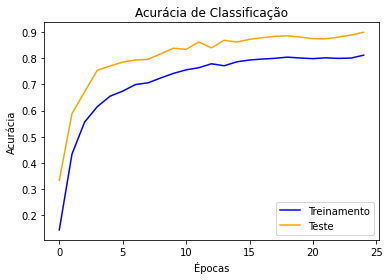

In [ ]:
loss = [2.2473, 1.5869, 1.2565, 1.0834, 0.9854, 0.9327, 0.8688, 0.8538, 0.7922, 0.7406, 0.7105, 0.6796, 0.6386, 0.6600, 0.6234, 0.6088, 0.5953, 0.5732, 0.5667, 0.5745, 0.5842, 0.5741, 0.5799, 0.5661, 0.5600]

sparse_categorical_accuracy = [0.1435, 0.4335, 0.5565, 0.6152, 0.6550, 0.6745, 0.6996, 0.7063, 0.7249, 0.7423, 0.7560, 0.7640, 0.7792, 0.7716, 0.7866, 0.7936, 0.7972, 0.8001, 0.8046, 0.8012, 0.7988, 0.8020, 0.7998, 0.8010, 0.8120]
val_loss = [1.8498, 1.2353, 0.9806, 0.7596, 0.7117, 0.6548, 0.6084, 0.6003, 0.5332, 0.5097, 0.4940, 0.4235, 0.4545, 0.3958, 0.4273, 0.3801, 0.3526, 0.3422, 0.3549, 0.3439, 0.3607, 0.3665, 0.3670, 0.3625, 0.3310]
val_sparse_categorical_accuracy = [0.3335, 0.5882, 0.6724, 0.7546, 0.7705, 0.7857, 0.7935, 0.7963, 0.8173, 0.8387, 0.8344, 0.8621, 0.8399, 0.8691, 0.8625, 0.8726, 0.8788, 0.8843, 0.8862, 0.8812, 0.8753, 0.8746, 0.8810, 0.8890, 0.8998]


plt.title('Acurácia de Classificação')
plt.plot(sparse_categorical_accuracy, color='blue', label='Treinamento')
plt.plot(val_sparse_categorical_accuracy, color='orange', label='Teste')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.savefig('acuracia.jpeg', dpi=600, quality=95)


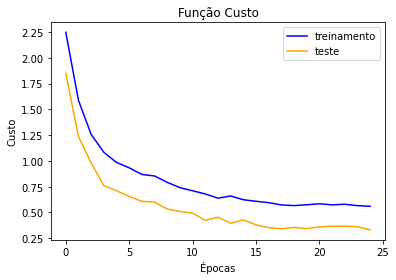

In [ ]:
plt.title('Função Custo')
plt.plot(loss, color='blue', label='treinamento')
plt.plot(val_loss, color='orange', label='teste')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.legend()

plt.savefig('custo.jpeg', dpi=600, quality = 95)

In [ ]:
_, acc = model3.evaluate(xtest, ytest)
print('> %.3f' % (acc * 100.0))

2567/2567 [==============================] - 64s 25ms/step
> 89.871


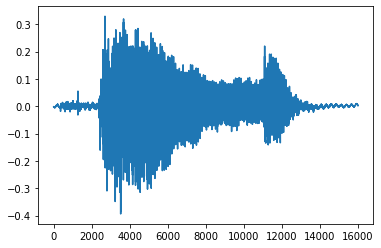

In [ ]:
plt.plot(xtest[0])

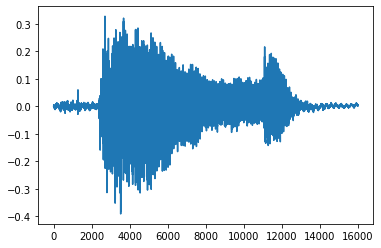

In [ ]:
import copy
ID = '/content/dataset/train/_background_noise_/dude_miaowing.wav.npy'
noiseSignal = np.load(ID)
noiseSignalLen = len(noiseSignal)
total = len(xtest)
xtestNoise = copy.deepcopy(xtest)
for i in range(total):
  randPos = np.random.randint(noiseSignalLen-fs)
  xtestNoise[i] = xtestNoise[i] + noiseSignal[randPos:randPos+fs]
plt.plot(xtestNoise[0])


In [ ]:
_, acc = model3.evaluate(xtestNoise, ytest)
print('> %.3f' % (acc * 100.0))


2567/2567 [==============================] - 56s 22ms/step
> 83.833


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


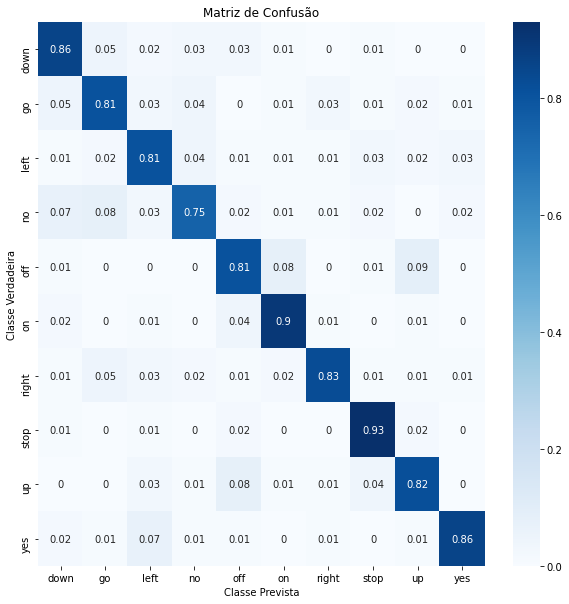

In [ ]:
import tensorflow as tf
import seaborn as sns

y_true = ytest
y_pred =  model3.predict_classes(xtestNoise)

classes = [
  'down',
  'go',
  'left',
  'no',
  'off',
  'on',
  'right',
  'stop',
  'up',
  'yes'
]
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                          index=classes,
                          columns=classes)

figure = plt.figure(figsize=(10, 10))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')
plt.title('Matriz de Confusão')
plt.savefig('confusao.jpeg', dpi=600, quality=95)
plt.show()